<a href="https://colab.research.google.com/github/PaoDeV99/ML_Progetto1_G72/blob/master/Progetto1_Gruppo72.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [ ]:
df = pd.read_fwf('/content/drive/My Drive/Colab Notebooks/dataset/MiniBooNE_PID.txt')

In [ ]:
df

,36499 93565,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,4.18624,135.885000,0.928671,0.140918,2.58663,1689.070,1.197950,19.35610,0.398340,0.658684,1.561270,0.320885,108.8560,5.16994,0.491493,0.868283,29.6141,1.222990,0.190005,-0.654163,4.97666,0.908007,0.385076,377.412,0.136108,0.310650,2.952640,-4.55567,0.934167,0.049752,101.174,-31.37300,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,4.65578,331.718000,0.882784,0.368855,2.24638,1388.260,0.839230,6.69510,0.277778,0.944626,1.664640,0.256501,102.4930,5.33218,0.474294,-0.336652,31.5767,1.317170,0.141945,0.093886,5.05478,1.394390,0.325034,215.837,0.082048,0.297530,0.777241,-4.76871,1.438210,0.068714,186.516,45.95970,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,4.50807,159.396000,0.412250,0.434002,2.38485,992.098,0.514175,16.00300,0.256262,0.318984,-0.727361,0.312139,69.8362,3.44976,0.497076,-0.314786,59.2516,1.187650,0.192565,-0.511144,5.27196,1.002860,1.690870,417.430,0.068628,0.220612,1.390970,-2.02213,1.843790,0.085132,129.931,-11.56080,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,4.08041,-1.865600,0.833067,0.181294,2.49837,1289.160,0.630307,12.93740,0.266055,1.313580,0.698101,0.306193,148.0340,4.12461,0.494778,0.331151,17.8265,1.700340,0.147487,0.313964,7.91668,1.584410,0.557134,352.699,0.079246,0.338915,-0.331218,-3.52184,1.244390,0.105550,163.978,-18.45860,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,4.59180,183.668000,0.398421,0.353034,2.04136,949.231,0.389585,13.91750,0.281003,0.282402,-0.039672,0.233509,106.8670,2.94245,0.464260,-0.033102,139.4700,1.687930,0.117804,0.021927,7.80990,1.317420,0.677348,317.556,0.041526,0.249403,-0.360560,-3.18766,1.808670,0.105852,229.555,42.96000,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130059,4.80718,1.451020,174.6920,0.343481,0.002174,0.000000,0.747401,0.725617,3.18501,0.152208,4.09329,-0.707947,0.813344,0.015294,1.83104,520.017,0.192353,7.59299,0.271739,0.580181,2.706590,0.321739,18.9165,4.77587,0.488641,0.578023,106.1100,1.827670,0.174318,0.523787,7.59281,1.451220,0.616285,453.588,0.015260,0.291661,-0.445277,-3.02319,1.513750,0.055040,179.832,-2.74376,0.317051,2.67617,0.000000,0.141958,0.723207,7.446300,3.219320,0.299487
130060,5.00527,1.501860,129.9270,0.273477,0.006098,0.109769,1.325370,0.830334,3.40836,0.130794,4.23870,49.729900,0.527637,0.337350,2.32783,779.822,0.295920,12.35990,0.280488,1.630800,-0.447177,0.302846,64.8961,2.66737,0.443424,-0.060302,149.7250,1.565400,0.138097,0.199993,7.29614,1.130380,1.100050,414.089,0.072055,0.288639,0.780298,-2.74524,1.216240,0.110098,120.794,-24.72180,0.312652,4.16524,0.000000,0.232273,0.141153,1.898750,1.778180,0.258058
130061,3.10842,2.178140,56.3651,0.211850,0.000000,0.167382,1.318900,0.870681,

In [ ]:

df["signal"]=0
df.iloc[0:36499,50]=1
df.iloc[36500:,50]=0
df

,36499 93565,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,signal
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,4.18624,135.885000,0.928671,0.140918,2.58663,1689.070,1.197950,19.35610,0.398340,0.658684,1.561270,0.320885,108.8560,5.16994,0.491493,0.868283,29.6141,1.222990,0.190005,-0.654163,4.97666,0.908007,0.385076,377.412,0.136108,0.310650,2.952640,-4.55567,0.934167,0.049752,101.174,-31.37300,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996,1
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,4.65578,331.718000,0.882784,0.368855,2.24638,1388.260,0.839230,6.69510,0.277778,0.944626,1.664640,0.256501,102.4930,5.33218,0.474294,-0.336652,31.5767,1.317170,0.141945,0.093886,5.05478,1.394390,0.325034,215.837,0.082048,0.297530,0.777241,-4.76871,1.438210,0.068714,186.516,45.95970,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621,1
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,4.50807,159.396000,0.412250,0.434002,2.38485,992.098,0.514175,16.00300,0.256262,0.318984,-0.727361,0.312139,69.8362,3.44976,0.497076,-0.314786,59.2516,1.187650,0.192565,-0.511144,5.27196,1.002860,1.690870,417.430,0.068628,0.220612,1.390970,-2.02213,1.843790,0.085132,129.931,-11.56080,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901,1
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,4.08041,-1.865600,0.833067,0.181294,2.49837,1289.160,0.630307,12.93740,0.266055,1.313580,0.698101,0.306193,148.0340,4.12461,0.494778,0.331151,17.8265,1.700340,0.147487,0.313964,7.91668,1.584410,0.557134,352.699,0.079246,0.338915,-0.331218,-3.52184,1.244390,0.105550,163.978,-18.45860,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990,1
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,4.59180,183.668000,0.398421,0.353034,2.04136,949.231,0.389585,13.91750,0.281003,0.282402,-0.039672,0.233509,106.8670,2.94245,0.464260,-0.033102,139.4700,1.687930,0.117804,0.021927,7.80990,1.317420,0.677348,317.556,0.041526,0.249403,-0.360560,-3.18766,1.808670,0.105852,229.555,42.96000,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130059,4.80718,1.451020,174.6920,0.343481,0.002174,0.000000,0.747401,0.725617,3.18501,0.152208,4.09329,-0.707947,0.813344,0.015294,1.83104,520.017,0.192353,7.59299,0.271739,0.580181,2.706590,0.321739,18.9165,4.77587,0.488641,0.578023,106.1100,1.827670,0.174318,0.523787,7.59281,1.451220,0.616285,453.588,0.015260,0.291661,-0.445277,-3.02319,1.513750,0.055040,179.832,-2.74376,0.317051,2.67617,0.000000,0.141958,0.723207,7.446300,3.219320,0.299487,0
130060,5.00527,1.501860,129.9270,0.273477,0.006098,0.109769,1.325370,0.830334,3.40836,0.130794,4.23870,49.729900,0.527637,0.337350,2.32783,779.822,0.295920,12.35990,0.280488,1.630800,-0.447177,0.302846,64.8961,2.66737,0.443424,-0.060302,149.7250,1.565400,0.138097,0.199993,7.29614,1.130380,1.100050,414.089,0.072055,0.288639,0.780298,-2.74524,1.216240,0.110098,120.794,-24.72180,0.312652,4.16524,0.000000,0.232273,0.141153,1.898750,1.778180,0.258058,0
130061,3.10842,2.178140,56.3651,0.211850,0.000000,0.

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[0.02232761 0.07722394 0.57660199 ... 0.03434471 0.05983779 1.60109178]
 [0.04344796 0.07426118 0.58995464 ... 0.03871271 0.06009488 1.60109178]
 [0.03549649 0.06503096 0.49614893 ... 0.03740985 0.06092627 1.60109178]
 ...
 [0.03088204 0.0486082  0.3901036  ... 0.04533082 0.06139489 0.62457381]
 [0.06975744 0.05417352 0.1438793  ... 0.04682425 0.06042934 0.62457381]
 [0.05487082 0.06261024 0.2660784  ... 0.04553712 0.0593281  0.62457381]]


In [ ]:
print(np.where(z > 3))

(array([     7,     11,     17, ..., 130043, 130043, 130043]), array([15, 15, 15, ..., 47, 48, 49]))


In [ ]:
df_o = df[(z < 3).all(axis=1)]

In [ ]:
df_o

,36499 93565,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,signal
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,4.18624,135.885000,0.928671,0.140918,2.58663,1689.070,1.197950,19.35610,0.398340,0.658684,1.561270,0.320885,108.8560,5.16994,0.491493,0.868283,29.6141,1.222990,0.190005,-0.654163,4.97666,0.908007,0.385076,377.412,0.136108,0.310650,2.952640,-4.55567,0.934167,0.049752,101.174,-31.37300,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996,1
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,4.65578,331.718000,0.882784,0.368855,2.24638,1388.260,0.839230,6.69510,0.277778,0.944626,1.664640,0.256501,102.4930,5.33218,0.474294,-0.336652,31.5767,1.317170,0.141945,0.093886,5.05478,1.394390,0.325034,215.837,0.082048,0.297530,0.777241,-4.76871,1.438210,0.068714,186.516,45.95970,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621,1
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,4.50807,159.396000,0.412250,0.434002,2.38485,992.098,0.514175,16.00300,0.256262,0.318984,-0.727361,0.312139,69.8362,3.44976,0.497076,-0.314786,59.2516,1.187650,0.192565,-0.511144,5.27196,1.002860,1.690870,417.430,0.068628,0.220612,1.390970,-2.02213,1.843790,0.085132,129.931,-11.56080,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901,1
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,4.08041,-1.865600,0.833067,0.181294,2.49837,1289.160,0.630307,12.93740,0.266055,1.313580,0.698101,0.306193,148.0340,4.12461,0.494778,0.331151,17.8265,1.700340,0.147487,0.313964,7.91668,1.584410,0.557134,352.699,0.079246,0.338915,-0.331218,-3.52184,1.244390,0.105550,163.978,-18.45860,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990,1
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,4.59180,183.668000,0.398421,0.353034,2.04136,949.231,0.389585,13.91750,0.281003,0.282402,-0.039672,0.233509,106.8670,2.94245,0.464260,-0.033102,139.4700,1.687930,0.117804,0.021927,7.80990,1.317420,0.677348,317.556,0.041526,0.249403,-0.360560,-3.18766,1.808670,0.105852,229.555,42.96000,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130059,4.80718,1.451020,174.6920,0.343481,0.002174,0.000000,0.747401,0.725617,3.18501,0.152208,4.09329,-0.707947,0.813344,0.015294,1.83104,520.017,0.192353,7.59299,0.271739,0.580181,2.706590,0.321739,18.9165,4.77587,0.488641,0.578023,106.1100,1.827670,0.174318,0.523787,7.59281,1.451220,0.616285,453.588,0.015260,0.291661,-0.445277,-3.02319,1.513750,0.055040,179.832,-2.74376,0.317051,2.67617,0.000000,0.141958,0.723207,7.446300,3.219320,0.299487,0
130060,5.00527,1.501860,129.9270,0.273477,0.006098,0.109769,1.325370,0.830334,3.40836,0.130794,4.23870,49.729900,0.527637,0.337350,2.32783,779.822,0.295920,12.35990,0.280488,1.630800,-0.447177,0.302846,64.8961,2.66737,0.443424,-0.060302,149.7250,1.565400,0.138097,0.199993,7.29614,1.130380,1.100050,414.089,0.072055,0.288639,0.780298,-2.74524,1.216240,0.110098,120.794,-24.72180,0.312652,4.16524,0.000000,0.232273,0.141153,1.898750,1.778180,0.258058,0
130061,3.10842,2.178140,56.3651,0.211850,0.000000,0.

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(
   df.iloc[:,0:50], df["signal"], test_size=0.33, random_state=42)

##AdaBoost con parametri dell' articolo

In [ ]:
trees = (100, 200, 300, 400, 500, 600, 700, 800, 900)
n=len(trees)


adam_train_accuracy=np.zeros((n))
adam_test_accuracy=np.zeros((n))
run_time=np.zeros((n))

for i,j in enumerate(trees):
    adam = AdaBoostClassifier(
      DecisionTreeClassifier(max_depth=45,criterion='entropy',splitter='best'),learning_rate=0.5,n_estimators=j)
    print('n_estimators: %i'%(j))

    start_time = time.time()
    adam.fit(x_train, y_train)
    run_time[i] = time.time() - start_time  

    adam_train_accuracy[i]=adam.score(x_train,y_train)
    adam_test_accuracy[i]=adam.score(x_test,y_test)
    predictions = adam.predict(x_test)
 
    result = (run_time[i], adam_train_accuracy[i], adam_test_accuracy[i])
    print('{0:<15}{1:<15}{2:<15}'.format("time (s)","train score", "test score"))
    print('{0:<15.4f}{1:<15.4f}{2:<15.4f}'.format(*result))
    print('\nConfusion matrix:')
    print(confusion_matrix(y_test, predictions))
    print('\n')
 

n_estimators: 100
time (s)       train score    test score     
222.9457       0.9999         0.9268         

Confusion matrix:
[[29668  1209]
 [ 1931 10114]]


n_estimators: 200
time (s)       train score    test score     
419.0078       0.9999         0.9317         

Confusion matrix:
[[29502  1375]
 [ 1558 10487]]


n_estimators: 300
time (s)       train score    test score     
577.5743       0.9999         0.9302         

Confusion matrix:
[[29358  1519]
 [ 1477 10568]]


n_estimators: 400
time (s)       train score    test score     
783.6304       0.9999         0.9311         

Confusion matrix:
[[29433  1444]
 [ 1514 10531]]


n_estimators: 500
time (s)       train score    test score     
819.3675       0.9999         0.9307         

Confusion matrix:
[[29218  1659]
 [ 1315 10730]]


n_estimators: 600
time (s)       train score    test score     
1457.5852      0.9999         0.9353         

Confusion matrix:
[[29492  1385]
 [ 1394 10651]]


n_estimators: 700
time (s)  

In [ ]:


adam = AdaBoostClassifier(
      DecisionTreeClassifier(max_depth=45,criterion='entropy',splitter='best'),learning_rate=0.5,n_estimators=1000)
print('n_estimators: ',1000)

start_time = time.time()
adam.fit(x_train, y_train)
run_time0 = time.time() - start_time  

adam_train_accuracy0=adam.score(x_train,y_train)
adam_test_accuracy0=adam.score(x_test,y_test)
predictions = adam.predict(x_test)
 
result = (run_time0, adam_train_accuracy0, adam_test_accuracy0)
print('{0:<15}{1:<15}{2:<15}'.format("time (s)","train score", "test score"))
print('{0:<15.4f}{1:<15.4f}{2:<15.4f}'.format(*result))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, predictions))
print('\n')

n_estimators:  1000
time (s)       train score    test score     
1478.7902      0.9999         0.9292         

Confusion matrix:
[[29345  1532]
 [ 1509 10536]]




Come visto nel paper le prestazioni aumentano con il numero di alberi, raggiungendo il picco a 800. C'è forte overfitting nel campione di training. IL tempo di elaborazione cresce proporzionalmente al numero di stimatori, il picco a 600 è propabilmente causato da un calo di connessione durante l' esecuzione in linea.

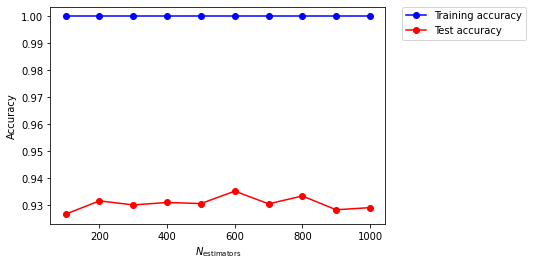

No handles with labels found to put in legend.


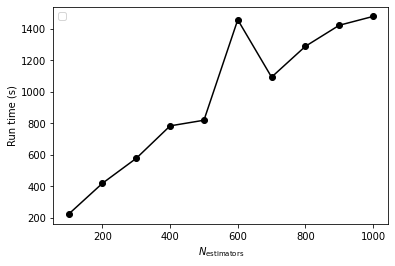

In [ ]:
trees = (100, 200, 300, 400, 500, 600, 700, 800, 900,1000)
adam_train_accuracy = (0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999)
adam_test_accuracy = (0.9268,0.9317,0.9302,0.9311,0.9307,0.9353,0.9306,0.9335,0.9284,0.9292)
run_time = (222.94,419.01,577.57,783.63,819.37,1457.59,1093.21,1288.99,1422.68,1478.79)
plt.figure()
plt.plot(trees,adam_train_accuracy,'o-b', label='Training accuracy')
plt.plot(trees,adam_test_accuracy,'o-r', label='Test accuracy')

plt.xlabel('$N_\mathrm{estimators}$')
plt.ylabel('Accuracy')
lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("gbc.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

plt.plot(trees, run_time, 'o-k')
plt.xlabel('$N_\mathrm{estimators}$')
plt.ylabel('Run time (s)')


plt.legend(loc=2)
plt.savefig("runtimegbc.pdf")

plt.show()

##Miglioriamo

Proviamo a realizzare un algoritmo che realizzi lo stesso compito ma con una accuracy o un tempo di elaborazione migliori. Prima ricerchiamo la migliore combinazione di parametri e poi la implementiamo nel classificatore.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [10,20],
              "learning_rate": [0.01,0.05,0.1,0.3,1]
             }


DTC = DecisionTreeClassifier(class_weight = "balanced",max_depth = None)

ABC = AdaBoostClassifier(base_estimator = DTC)

cv_inst = RandomizedSearchCV(ABC,
  param_distributions = param_grid,
  cv=3,
  n_iter = 10,
  n_jobs=-1)

cv_inst.fit(x_test, y_test)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                      class_weight='balanced',
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                   

In [ ]:
cv_inst.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'random',
 'learning_rate': 0.1,
 'n_estimators': 20}

In [ ]:
adam_best = AdaBoostClassifier(
     DecisionTreeClassifier(criterion='entropy',splitter='random'),learning_rate=0.1,n_estimators=20,
     ) 

In [ ]:
start_time = time.time()
adam_best.fit(x_train, y_train)
run_time = time.time() - start_time  
adam_best_train_accuracy=adam_best.score(x_train,y_train)
adam_best_test_accuracy=adam_best.score(x_test,y_test)
predictions = adam_best.predict(x_test)
result = (run_time, adam_best_train_accuracy, adam_best_test_accuracy)
print('{0:<15}{1:<15}{2:<15}'.format("time (s)","train score", "test score"))
print('{0:<15.4f}{1:<15.4f}{2:<15.4f}'.format(*result))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, predictions))

time (s)       train score    test score     
15.1013        0.9999         0.9357         

Confusion matrix:
[[29571  1306]
 [ 1454 10591]]


Miglioramento prestazioni: tempo di elaborazione ridotto di 86 volte rispetto a quello con 800 alberi (migliore test accuracy) e una accuracy comparabile.

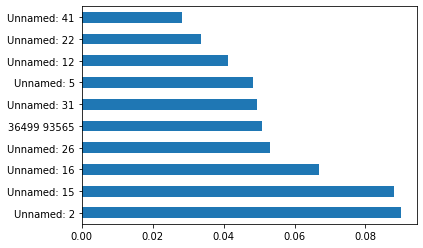

In [ ]:
import matplotlib.pyplot as plt

feat_importances_best = pd.Series(adam_best.feature_importances_, index=x_train.columns)
feat_importances_best.nlargest(10).plot(kind='barh')
plt.show()

##Analisi senza Outliers

In [ ]:
 x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(
   df_o.iloc[:,0:50], df_o["signal"], test_size=0.33, random_state=42)

In [ ]:
trees = (100, 200, 300, 400, 500, 600, 700, 800, 900,1000)
n=len(trees)


adam_train_accuracy=np.zeros((n))
adam_test_accuracy=np.zeros((n))
run_time=np.zeros((n))

for i,j in enumerate(trees):
    adam = AdaBoostClassifier(
      DecisionTreeClassifier(max_depth=45,criterion='entropy',splitter='best'),learning_rate=0.5,n_estimators=j)
    print('n_estimators: %i'%(j))

    start_time = time.time()
    adam.fit(x_train_o, y_train_o)
    run_time[i] = time.time() - start_time  

    adam_train_accuracy[i]=adam.score(x_train_o,y_train_o)
    adam_test_accuracy[i]=adam.score(x_test_o,y_test_o)
    predictions = adam.predict(x_test_o)
 
    result = (run_time[i], adam_train_accuracy[i], adam_test_accuracy[i])
    print('{0:<15}{1:<15}{2:<15}'.format("time (s)","train score", "test score"))
    print('{0:<15.4f}{1:<15.4f}{2:<15.4f}'.format(*result))
    print('\nConfusion matrix:')
    print(confusion_matrix(y_test_o, predictions))
    print('\n')

n_estimators: 100
time (s)       train score    test score     
11.1199        1.0000         0.8973         

Confusion matrix:
[[28395  2065]
 [ 2121  8168]]


n_estimators: 200
time (s)       train score    test score     
11.1270        1.0000         0.8970         

Confusion matrix:
[[28378  2082]
 [ 2114  8175]]


n_estimators: 300
time (s)       train score    test score     
11.0858        1.0000         0.8964         

Confusion matrix:
[[28349  2111]
 [ 2109  8180]]


n_estimators: 400
time (s)       train score    test score     
11.1603        1.0000         0.8974         

Confusion matrix:
[[28376  2084]
 [ 2095  8194]]


n_estimators: 500
time (s)       train score    test score     
11.2805        1.0000         0.8968         

Confusion matrix:
[[28381  2079]
 [ 2125  8164]]


n_estimators: 600
time (s)       train score    test score     
11.2077        1.0000         0.8972         

Confusion matrix:
[[28385  2075]
 [ 2116  8173]]


n_estimators: 700
time (s)  

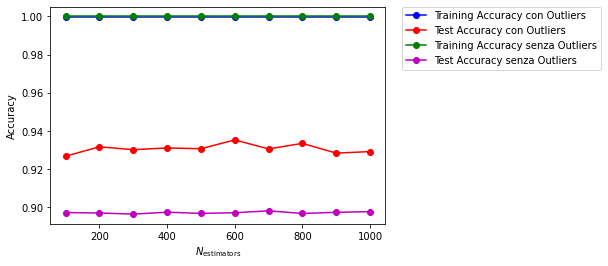

In [ ]:
trees = (100, 200, 300, 400, 500, 600, 700, 800, 900,1000)
adam_train_accuracy_wo = (0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999)
adam_test_accuracy_wo = (0.9268,0.9317,0.9302,0.9311,0.9307,0.9353,0.9306,0.9335,0.9284,0.9292)
plt.figure()
plt.plot(trees,adam_train_accuracy_wo,'o-b', label='Training Accuracy con Outliers')
plt.plot(trees,adam_test_accuracy_wo,'o-r', label='Test Accuracy con Outliers')
plt.plot(trees,adam_train_accuracy,'o-g', label='Training Accuracy senza Outliers')
plt.plot(trees,adam_test_accuracy,'o-m', label='Test Accuracy senza Outliers')

plt.xlabel('$N_\mathrm{estimators}$')
plt.ylabel('Accuracy')
lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("gbc.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')




plt.show()

Quello che si conclude è che escludendo gli outliers l' accuracy cala di 3 punti percentuali e diminuisce ancora di più la dipendenza dal numero di stimatori e dominano le fluttuazioni casuali.